In [5]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#### Question 1

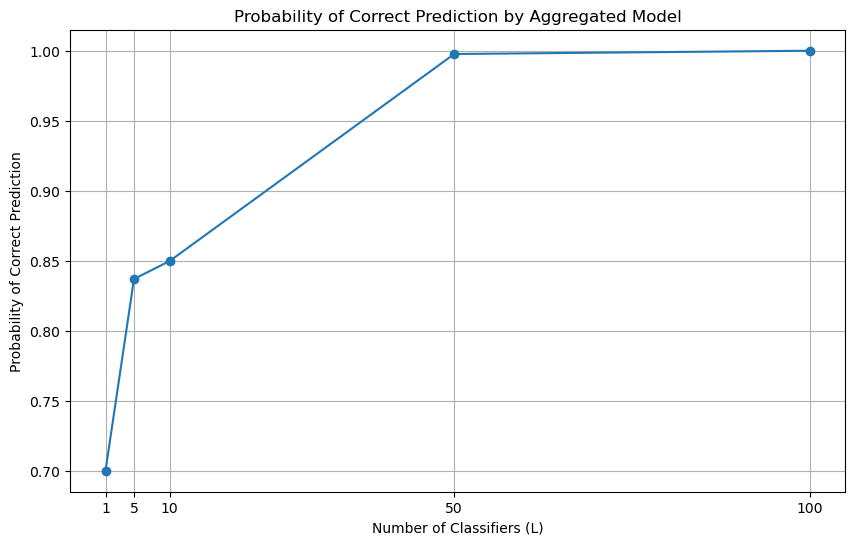

In [4]:
# Probability of an individual classifier being correct
p = 0.7

# Number of classifiers
L_values = [1,5,10,50,100]

# Calculate the probability of the aggregated model being correct for different L
probabilities = [1 - binom.cdf(L//2, L, p) for L in L_values]

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(L_values, probabilities, marker='o')
plt.title('Probability of Correct Prediction by Aggregated Model')
plt.xlabel('Number of Classifiers (L)')
plt.ylabel('Probability of Correct Prediction')
plt.grid(True)
plt.xticks(L_values)
plt.show()

## Bagging

#### Question 2

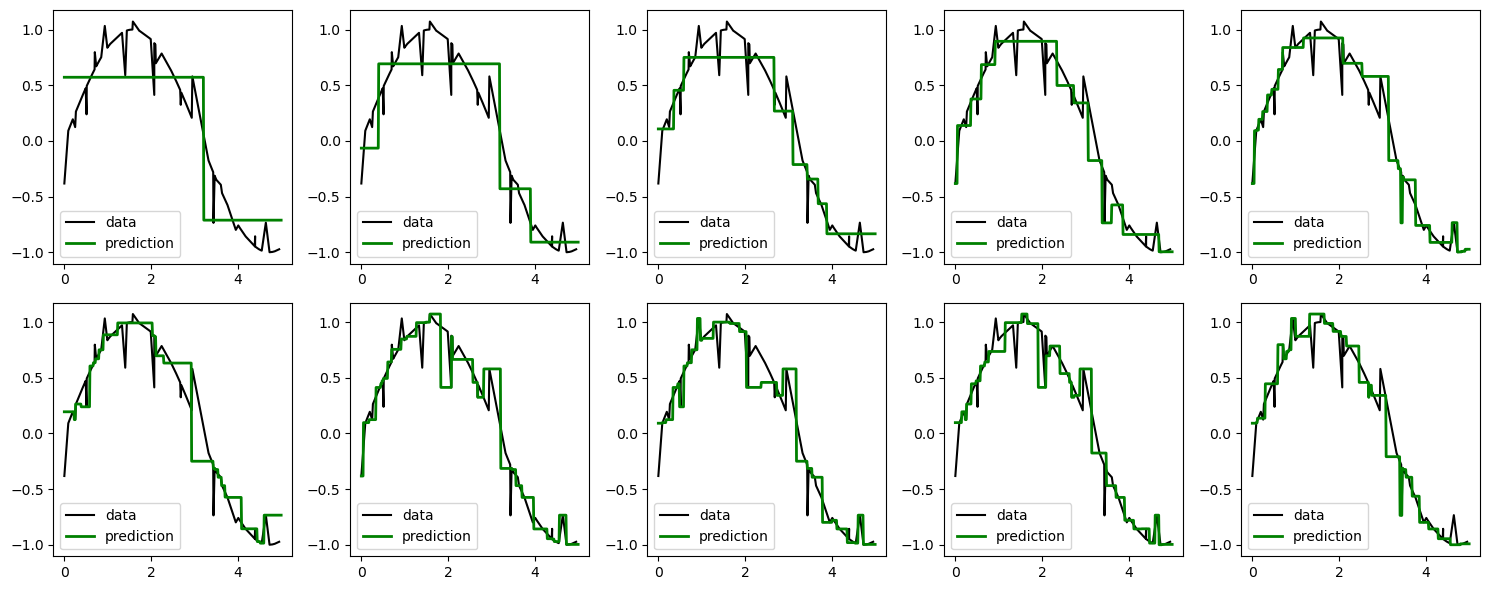

In [15]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(1, 11):
    tree = DecisionTreeRegressor(max_depth=i)
    bagging = BaggingRegressor(tree, n_estimators=1, max_samples=0.5, bootstrap=True, n_jobs=-1)
    bagging.fit(X, y)
    y_pred = bagging.predict(X_test)

    # Affichage des résultats
    ax = axs[(i - 1) // 5, (i - 1) % 5]  # Select the correct subplot
    ax.plot(X, y, c="k", label="data")
    ax.plot(X_test, y_pred, c="g", label="prediction", linewidth=2)
    ax.legend()

plt.tight_layout()
plt.show()

#### Question 3

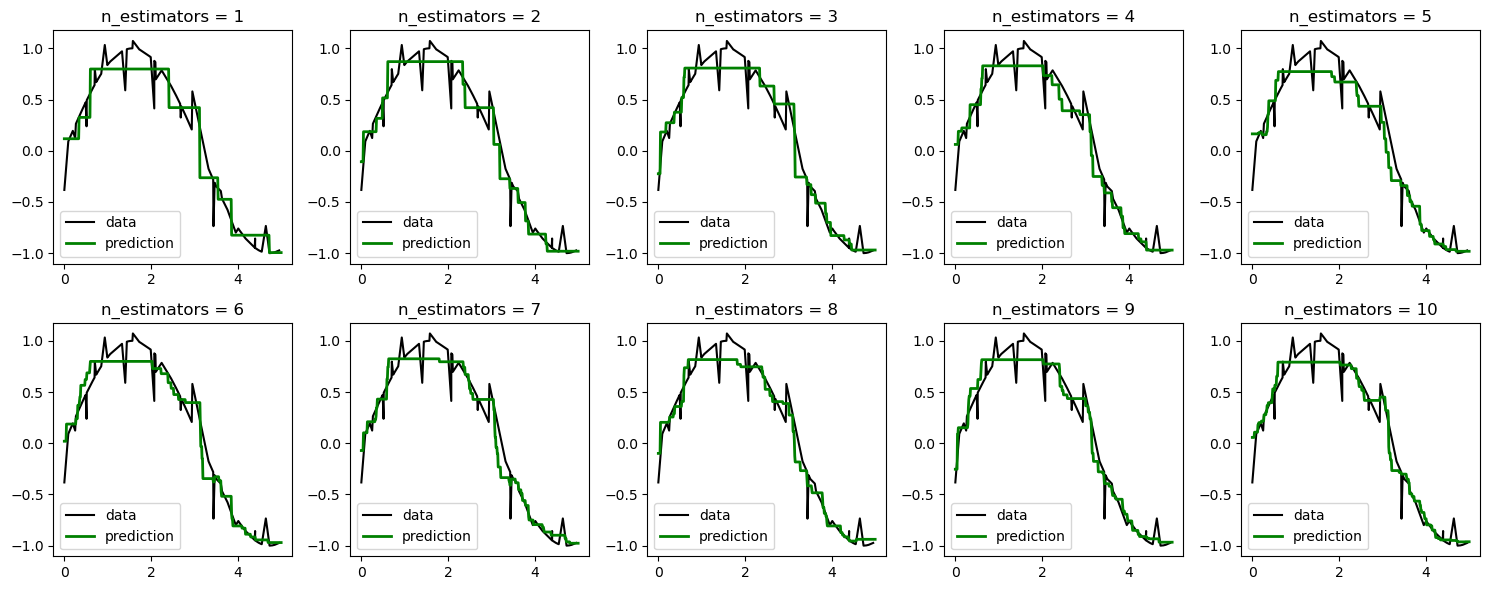

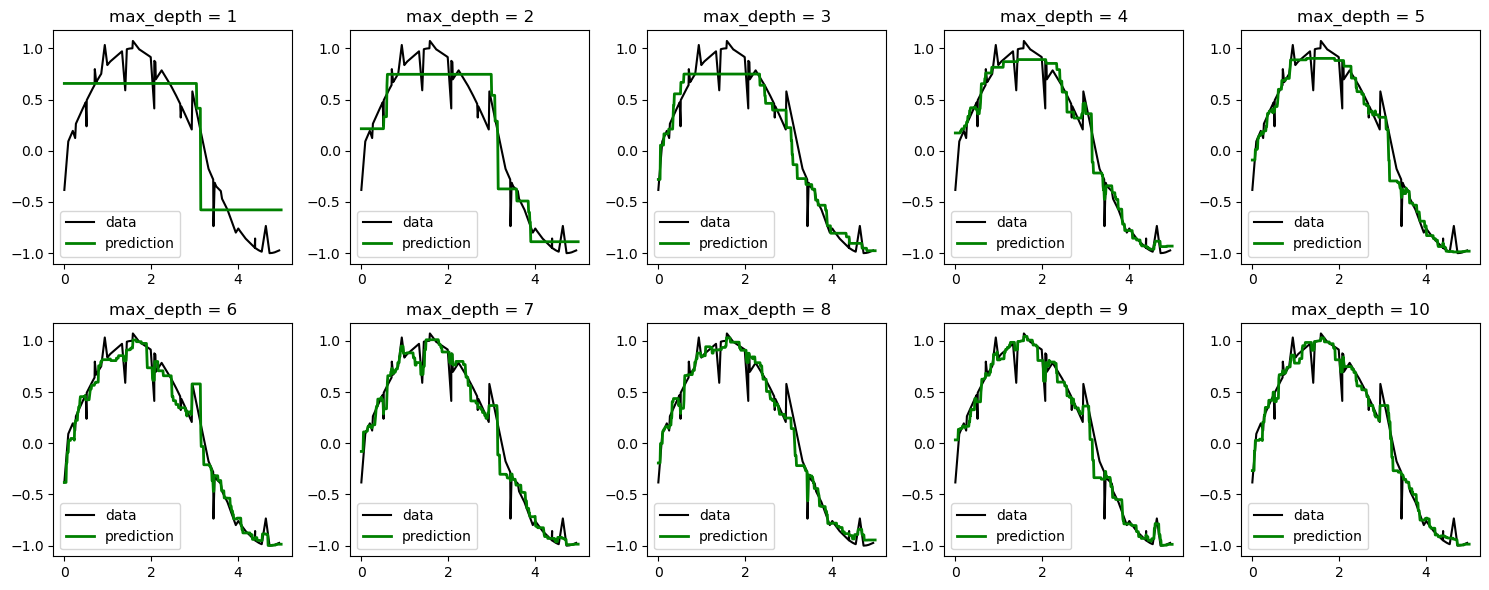

In [17]:
# Illustrer le rôle de L et de la profondeur des arbres en jouant sur les paramètres de BaggingRegressor

# Paramètre à faire varier : n_estimators qui représente le nombre d'arbres utilisés

fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # Create 2x5 subplots

for i in range(1, 11):
    tree = DecisionTreeRegressor(max_depth=3)
    bagging = BaggingRegressor(tree, n_estimators=i, max_samples=0.5, bootstrap=True, n_jobs=-1)
    bagging.fit(X, y)
    y_pred = bagging.predict(X_test)

    # Affichage des résultats
    ax = axs[(i - 1) // 5, (i - 1) % 5]  # Select the correct subplot
    ax.plot(X, y, c="k", label="data")
    ax.plot(X_test, y_pred, c="g", label="prediction", linewidth=2)
    ax.legend()
    ax.title.set_text(f"n_estimators = {i}")

plt.tight_layout()
plt.show()

# Paramètre à faire varier : max_depth qui représente la profondeur des arbres utilisés

fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # Create 2x5 subplots

for i in range(1, 11):
    tree = DecisionTreeRegressor(max_depth=i)
    bagging = BaggingRegressor(tree, n_estimators=5, max_samples=0.5, bootstrap=True, n_jobs=-1)
    bagging.fit(X, y)
    y_pred = bagging.predict(X_test)

    # Affichage des résultats
    ax = axs[(i - 1) // 5, (i - 1) % 5]  # Select the correct subplot
    ax.plot(X, y, c="k", label="data")
    ax.plot(X_test, y_pred, c="g", label="prediction", linewidth=2)
    ax.legend()
    ax.title.set_text(f"max_depth = {i}")

plt.tight_layout()
plt.show()

#### Question 4

<u>Réponse</u>:
On peut voir une tendance à l'overfitting quand les arbres sont biaisés, avec une courbe de valeurs prédites qui épouse complétement les données réelles. En général, plus l'arbre est profond plus le risque d'overfitting est grand. 

Toutefois, en utilisant plusieurs estimateurs, le bagging réduit la variance globale du modèle en lissant les prédictions individuelles des arbres. Cela aide à éviter le surajustement car les erreurs aléatoires présentes dans chaque échantillon d'entraînement ont moins d'impact sur la prédiction globale.

#### Question 5

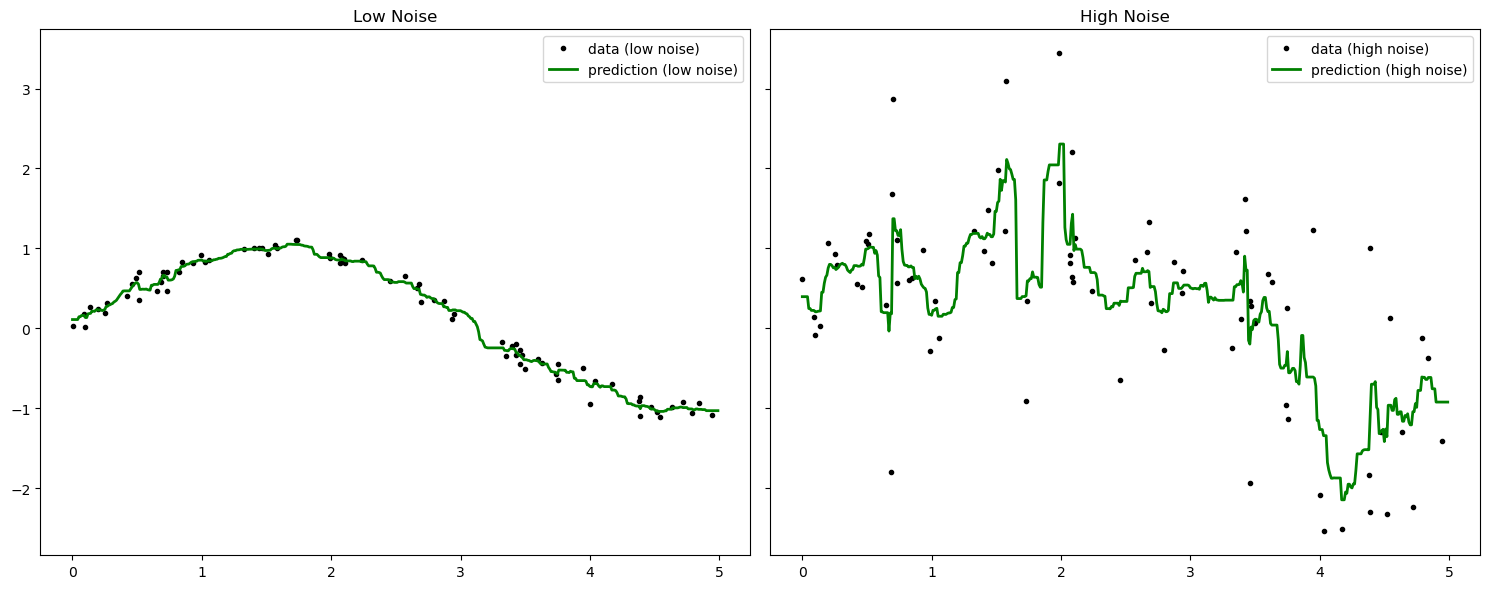

In [18]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Define noise levels
low_noise = 0.1
high_noise = 1.0

# Add different levels of noise to the data
y_low_noise = y + (low_noise * rng.randn(80))
y_high_noise = y + (high_noise * rng.randn(80))

# Add more noise to every 5th value
y_low_noise[::5] += (low_noise * (0.5 - rng.rand(16)))
y_high_noise[::5] += (high_noise * (0.5 - rng.rand(16)))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Create the figure
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Train and plot the model with low noise
tree_low_noise = DecisionTreeRegressor(max_depth=10)
bagging_low_noise = BaggingRegressor(tree_low_noise, n_estimators=100, max_samples=0.5, bootstrap=True, n_jobs=-1)
bagging_low_noise.fit(X, y_low_noise)
y_pred_low_noise = bagging_low_noise.predict(X_test)

axs[0].plot(X, y_low_noise, 'k.', label="data (low noise)")
axs[0].plot(X_test, y_pred_low_noise, 'g-', label="prediction (low noise)", linewidth=2)
axs[0].legend()
axs[0].set_title('Low Noise')

# Train and plot the model with high noise
tree_high_noise = DecisionTreeRegressor(max_depth=10)
bagging_high_noise = BaggingRegressor(tree_high_noise, n_estimators=100, max_samples=0.5, bootstrap=True, n_jobs=-1)
bagging_high_noise.fit(X, y_high_noise)
y_pred_high_noise = bagging_high_noise.predict(X_test)

axs[1].plot(X, y_high_noise, 'k.', label="data (high noise)")
axs[1].plot(X_test, y_pred_high_noise, 'g-', label="prediction (high noise)", linewidth=2)
axs[1].legend()
axs[1].set_title('High Noise')

plt.tight_layout()
plt.show()